<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_12_09_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**04. SVD(singular value decomposition)**

SVD 개요

pca와 유사한 행렬 분해 기법 이용. svd는 정방행렬뿐만 아니라 행과 열 크기 다른 행렬에서도 적용 가능. 특이값 분해로 불린다. 서로 직교하는 성질을 가지는 특이 벡터로 구성됨. 보통 넘파이나 사이파이 라이브러리 이용해 수행한다.

In [ ]:
#넘파이의 svd모듈 임포트
import numpy as np
from numpy.linalg import svd

#4x4 랜덤 행렬 a 생성
np.random.seed(121)
a=np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


a에 svd 적용해 u, sigma, Vt를 도출하자. 여기서 시그마는 대각행렬이니까 0아닌 값의 경우만 1차원으로 표현해준다.

In [ ]:
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matirx:\n', np.round(U,3))
print('Sigma value:\n', np.round(Sigma,3))
print('Vt transpose matirx:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matirx:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma value:
 [3.423 2.023 0.463 0.079]
Vt transpose matirx:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


이 분해된 행렬들이 다시 원본 행렬로 복원되는지 보자. 이 행렬들을 내적하면 되겠지. 시그마만 1차원으로 도출했으므로 다시 대각행렬로 돌려준 다음에 내적한다.

In [ ]:
#sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat=np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


동일하게 복원된다.

이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 시그마 값이 변하고 이에 따른 차원 축소가 진행되는지 보자. 의존성 부여 위해 a 행렬의 3번째 로우를 첫번째 로우+두번째 로우로 업데이트하고 4번째 로우는 첫 번째 로우와 같다고 업데이트.

In [ ]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


로우 간 관계가 매우 높아진 이 데이터를 svd로 다시 분해.

In [ ]:
#다시 svd 수행해 sigma 값 확인
U, Sigma, Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma value:
 [2.663 0.807 0.    0.   ]


시그마 값 중 2개가 0이 됨. **선형 독립인 로우 벡터의 개수가 2개라는 의미**. 다시 원본 복원해보자. 전체 데이터 쓰지 않고 시그마의 0에 대응되는 U, sigma, vt의 데이터 제외하고 복원해보자.

In [ ]:
#u 행렬의 경우 sigma와 내적을 수행하므로 sigma의 앞 2행에 대응되는 앞 2열만 추출
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
#v 전치 행렬의 경우 앞 2행만 추출
Vt_=Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
#u, sigma, vt 내적 수행해 원본 행렬 복원
a_=np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


이번에는 truncated svd를 이용해 행렬을 분해해보자. 시그마 행렬에 있는 대각원소 중 상위 일부 데이터만 추출해 분해하는 방식. 인위적으로 더 작은 차원의 행렬들로 분해되기 때문에 원본 행렬을 정확하게 복원하지는 못함. 하지만 상당한 수준으로 근사할 수 있음. 

사이파이에서만 지원됨. scipy.sparse.linalg.svds 이용.

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본 행렬 출력하고 svd 적용할 경우 u, sigma, vt의 차원 확인
np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt=svd(matrix, full_matrices=False)
print('\n 분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\n sigma 값 행렬:', Sigma)

#truncated svd로 sigma 행렬의 특이값을 4개로 하여 truncated svd 수행.
num_components=4
U_tr, Sigma_tr, Vt_tr=svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma 값 행렬:', Sigma_tr)
matrix_tr=np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) #output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해 행렬 차원: (6, 6) (6,) (6, 6)

 sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma 값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673

n_components 때문에 다른 차원으로 분해됨. 복원할 경우 근사함.

**사이킷런 truncatedSVD 클래스를 이용한 변환**

u, sigma, vt 행렬을 반환하지는 않음. pca와 유사하게 fit, transform 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환. 

Text(0, 0.5, 'TruncatedSVD component 2')

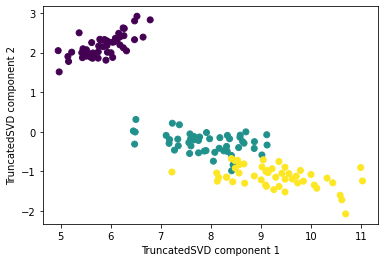

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
#2개의 주요 컴포넌트로 truncatedSVD로 변환
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd=tsvd.transform(iris_ftrs)

#산점도 2차원으로 truncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD component 1')
plt.ylabel('TruncatedSVD component 2')

truncatedSVD변환 역시 pca와 유사하게 변환 후 품종별로 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음.

truncatedSVD와 pca 클래스를 더 자세히 보면 두개 클래스 모두 svd를 이용해 행렬을 분해.

Text(0.5, 1.0, 'PCA 변환')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0, flags=flags)


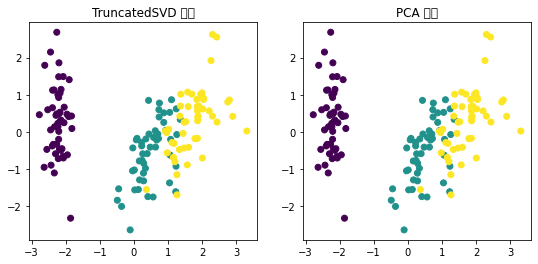

In [ ]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 standardScaler로 변환
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

#스케일링된 데이터 기반으로 truncatedSVD 수행
tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

#스케일링된 데이터 기반으로 pca 수행
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

#truncatedSVD 변환 데이터를 왼쪽에, pca 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2)=plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('TruncatedSVD 변환')
ax2.set_title('PCA 변환')

거의 같다.

In [ ]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3224709192840956e-15
2.7755575615628914e-17


모두 0에 가까운 값이므로 2개의 변환이 거의 같음을 알 수 있다. 즉 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 svd와 pca는 동일 변환을 수행.

>**05. NMF(Non-negative matrix factorization)**

**NMF 개요**

nmf는 truncated svd와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형. 원본 행렬 내 모든 원소 값이 모두 양수라는게 보장되면 간단하게 두 개의 기반 양수 행렬로 분해. W행렬(원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)과 H행렬(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해. 잠재 요소를 가짐. 

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 영역에서 사용. nmf 클래스 이용.

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

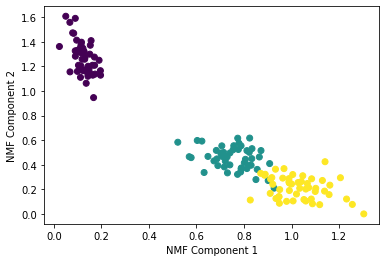

In [1]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs=iris.data
nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf=nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨. 추천 영역에도. 잠재 요소 기반의 추천 방식(latent factoring)

>**06. 정리**

차원 축소 알고리즘의 대표 PCA, LDA, SVD, NMF. 단순 피처 개수 줄이는 개념보단 이를 통해 데이터를 잘 설명하는 잠재적 요소를 추출하는데 의미.

PCA는 입력 데이터의 변동성이 가장 큰 축을 구하고 이 축에 직각인 축을 반복적으로 축소하는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식. 고유벡터 생성. LDA는 PCA에 비해 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소.

SVD와 NMF는 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법. 잠재적 요소를 추출해서 토픽 모델링이나 추천 시스템에서 활용.